In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
import numpy as np

bitcoin_data =pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/bitcoin_DTW/dataset/bitcoin.csv')
HymanMinsky_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/bitcoin_DTW/HymanMinsky.csv')

In [27]:
bitcoin_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1738,2018-01-30,11306.80,11307.20,10036.20,10106.30,"8,637,860,000","190,339,000,000"
1739,2018-01-31,10108.20,10381.60,9777.42,10221.10,"8,041,160,000","170,183,000,000"
1740,2018-02-01,10237.30,10288.80,8812.28,9170.54,"9,959,400,000","172,372,000,000"
1741,2018-02-02,9142.28,9142.28,7796.49,8830.75,"12,726,900,000","153,953,000,000"


In [28]:
HymanMinsky_data

,x,y
0,0.581395,12.444697
1,2.761628,12.693917
2,5.232558,12.699943
3,8.139535,12.950936
4,10.319767,13.444058
...,...,...
60,94.476744,12.429807
61,96.220930,16.580403
62,97.819767,21.462351
63,99.273256,25.124433


In [29]:
bitcoin_data['Close']

0         134.21
1         144.54
2         139.00
3         116.99
4         105.21
          ...   
1738    10106.30
1739    10221.10
1740     9170.54
1741     8830.75
1742     9174.91
Name: Close, Length: 1743, dtype: float64

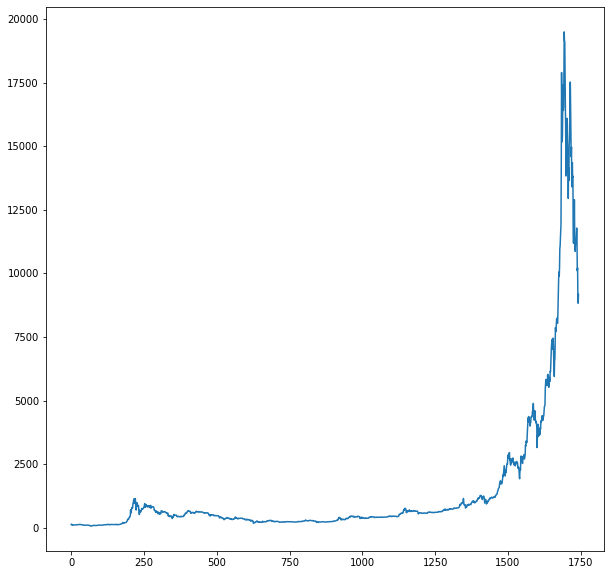

In [30]:
import matplotlib.pyplot as plt

plt.plot(bitcoin_data['Close'])
plt.show()

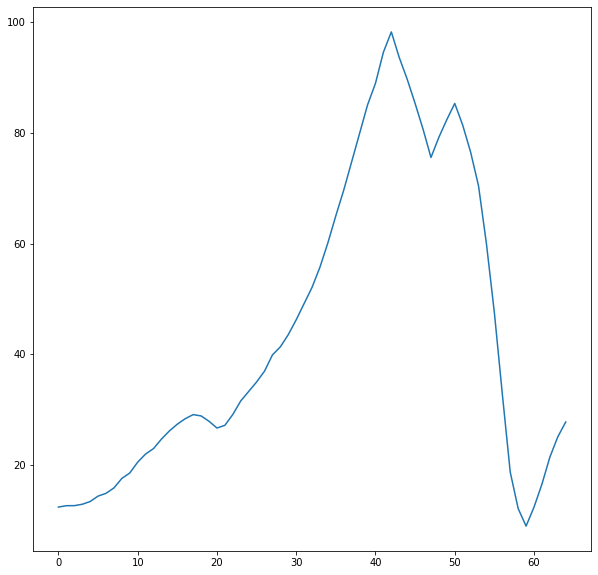

In [31]:
plt.plot(HymanMinsky_data['y'])
plt.show()

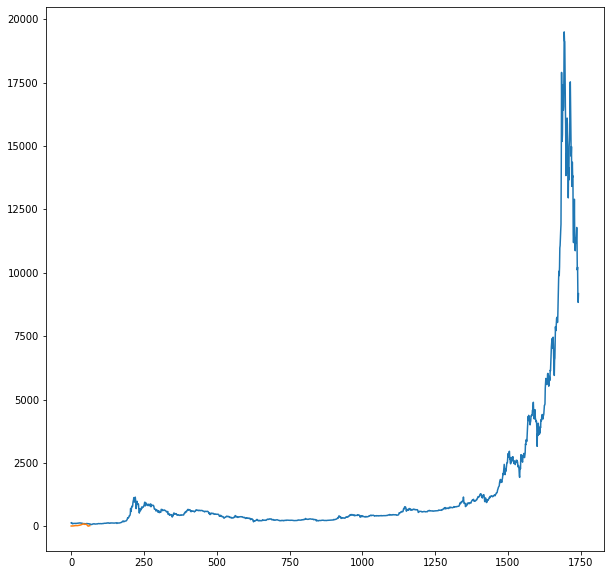

In [32]:
plt.plot(bitcoin_data['Close'])
plt.plot(HymanMinsky_data['y'])
plt.show()

In [33]:
bitcoin_close_data = bitcoin_data['Close'].to_numpy()

len(bitcoin_close_data)

1743

In [34]:
HymanMinsky_y_data = HymanMinsky_data['y'].to_numpy()

len(HymanMinsky_y_data)

65

In [0]:
# D(i, j) = |xi - yi| + min{D(i-1, j), D(i-1, j-1), D(i, j-1)}
# x와 y를 통해 새로운 행렬 D 생성 --> D의 각 원소는 xi, yi의 거리를 의미
def DTW(x, y):
  x_size = len(x)
  y_size = len(y)

  D = np.full((x_size, y_size), np.inf, dtype=float) # inf로 가득 채움 (1743, 65)

  temp = np.abs(x - y[0])

  for c in range(temp.shape[0]):
    D[c, 0] = temp[c]

  temp = np.abs(x[0] - y)

  for c in range(temp.shape[0]):
    D[0, c] = temp[c]

  for i in range(1, D.shape[0]):
    for j in range(1, D.shape[1]):
      length = np.abs(x[i] - y[j])
      D[i,j] = length + min(D[i-1, j], D[i-1, j-1], D[i, j-1])

  return D


In [36]:
result = DTW(bitcoin_close_data, HymanMinsky_y_data)

result

array([[1.21765303e+02, 1.21516083e+02, 1.21510057e+02, ...,
        1.12747649e+02, 1.09085567e+02, 1.06401222e+02],
       [1.32095303e+02, 2.53362167e+02, 2.53350113e+02, ...,
        2.35825298e+02, 2.28501134e+02, 2.23132445e+02],
       [1.26555303e+02, 2.52861387e+02, 3.79161444e+02, ...,
        3.53362947e+02, 3.42376702e+02, 3.34323667e+02],
       ...,
       [9.15809530e+03, 1.83159414e+04, 2.74737814e+04, ...,
        5.74943955e+05, 5.84089371e+05, 5.93232102e+05],
       [8.81830530e+03, 1.76363614e+04, 2.64544114e+04, ...,
        5.53537185e+05, 5.62342811e+05, 5.71145752e+05],
       [9.16246530e+03, 1.79805214e+04, 2.67985714e+04, ...,
        5.53881345e+05, 5.62686971e+05, 5.71489912e+05]])

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]

In [38]:
df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,121.765303,121.516083,121.510057,121.259064,120.765942,119.782533,119.288701,118.307774,116.593012,115.609957,113.651293,112.181143,111.199861,109.486163,108.017076,106.790828,105.807774,105.069331,105.306852,106.277499,107.493111,107.001407,105.045579,102.601946,100.891792,99.179158,97.223684,94.292246,92.824577,90.624847,87.938729,85.009419,82.078690,78.418735,74.027428,69.146897,64.510978,59.387964,54.264594,49.141580,45.236659,39.625485,35.963403,40.596132,44.497507,48.887042,53.520125,58.641012,54.979994,51.806781,48.877825,52.777782,57.654767,63.751265,74.237297,86.674549,101.306568,115.450428,122.033667,125.199790,121.780193,117.629597,112.747649,109.085567,106.401222
1,132.095303,253.362167,253.350113,252.848128,251.861883,249.895065,248.907402,246.945547,243.516024,241.549915,237.632587,234.692286,232.729722,229.302326,226.364152,223.911656,221.945547,220.468661,220.706183,221.914351,224.100610,224.332813,220.421157,215.533891,212.113585,208.688315,204.777368,198.914492,195.979155,191.579694,186.207459,180.348837,174.487379,167.167470,158.384855,148.623795,139.351957,129.105927,118.859189,108.613159,100.803318,89.580970,82.256807,86.889535,95.423639,103.714549,112.737167,122.491137,120.289989,113.943562,108.085649,111.985607,120.762550,131.736032,148.318562,171.241846,198.311117,227.086997,247.814095,257.563457,253.890386,245.589195,235.825298,228.501134,223.132445
2,126.555303,252.861387,379.161444,378.897192,377.417825,374.467598,372.986103,370.043321,364.899036,361.949872,356.073880,351.663429,348.719583,343.578488,339.171228,335.492484,332.543321,330.327992,330.565513,331.773681,334.197462,335.892016,330.256736,322.925837,317.795377,312.657473,306.791052,297.996739,293.593732,286.994541,278.936188,270.148256,261.356069,250.376205,237.202283,222.560692,208.652935,193.283891,177.913783,162.544739,150.829977,133.996455,123.010210,127.642938,136.177042,149.100681,162.024674,176.168179,180.059983,170.540343,161.753474,165.653432,174.430374,189.303815,210.763330,239.783111,277.338415,318.551546,353.910664,377.803885,380.460579,368.008792,353.362947,342.376702,334.323667
3,104.545303,208.841387,313.131444,417.170508,480.963766,477.030130,475.054804,471.131095,464.272048,460.339830,452.505173,446.624572,442.699444,435.844651,429.968304,425.063313,421.131095,418.177323,418.414844,419.623012,422.046792,423.978868,418.082314,408.307782,401.467170,394.616631,386.794736,375.068985,369.198310,360.399387,349.654918,337.937674,326.214759,311.574940,294.009711,274.487589,255.943914,235.451855,214.958378,194.466319,178.846636,156.401940,141.753613,146.386341,154.920445,167.844084,185.400805,203.445686,213.928174,205.127124,193.411299,197.311256,206.088199,220.961639,246.321112,280.217879,323.869680,375.568843,423.365213,461.890454,482.364078,468.418389,448.890596,434.242269,423.504889
4,92.765303,185.281387,277.791444,370.050508,461.816449,552.598982,565.343505,560.438868,551.865060,546.949787,537.156466,529.805715,524.899305,516.330814,508.985380,502.854141,497.938868,494.246653,494.484175,495.692343,498.116123,500.048199,494.127893,481.909728,473.358962,464.795788,455.018420,440.361231,433.022887,422.024234,408.593647,393.947093,379.293449,360.993676,339.037138,314.634487,291.454892,265.839818,240.222972,214.607898,195.083296,167.027425,148.717016,153.349745,161.883849,174.807487,192.364209,215.041818,229.425681,227.933905,213.289124,217.189081,225.966024,240.839464,266.198936,303.995661,352.524447,410.320108,468.602510,519.565003,554.670647,557.047986,532.638244,514.327836,500.906112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1

Text(0.5, 1.0, 'Correlation Heatmap')

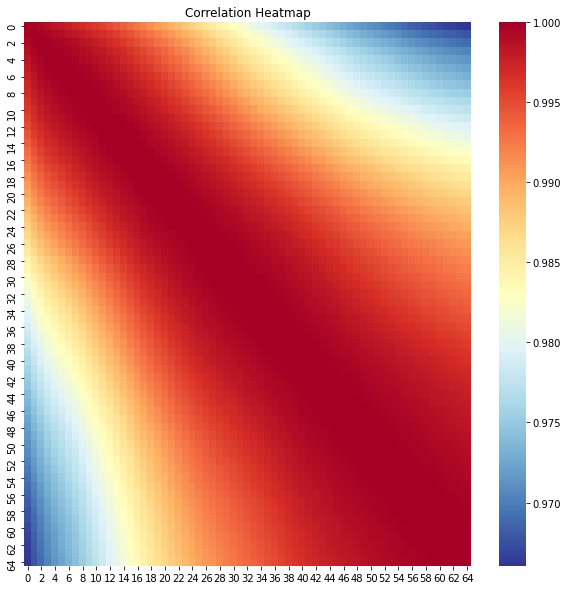

In [39]:
correlations = df.corr()

sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

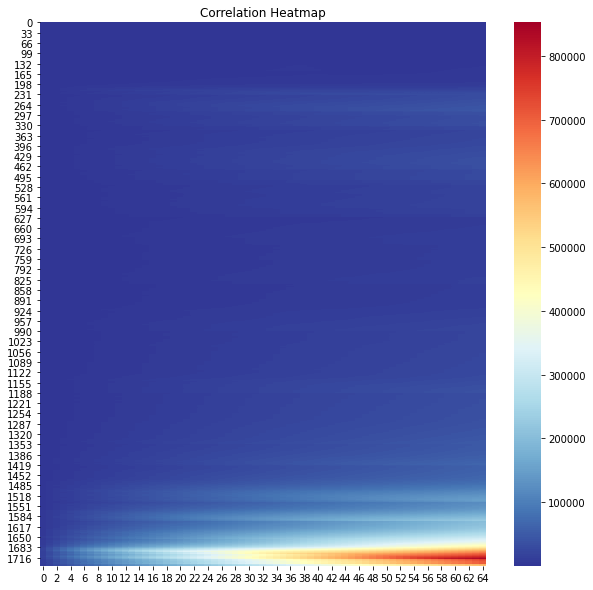

In [40]:
sns.heatmap(df, cmap = plt.cm.RdYlBu_r)
plt.title('Correlation Heatmap')

In [0]:
from sklearn.preprocessing import MinMaxScaler

mns = MinMaxScaler()
bitcoin_data['adj_close'] = mns.fit_transform(bitcoin_data[['Close']])
HymanMinsky_data['adj_y'] = mns.fit_transform(HymanMinsky_data[['y']])


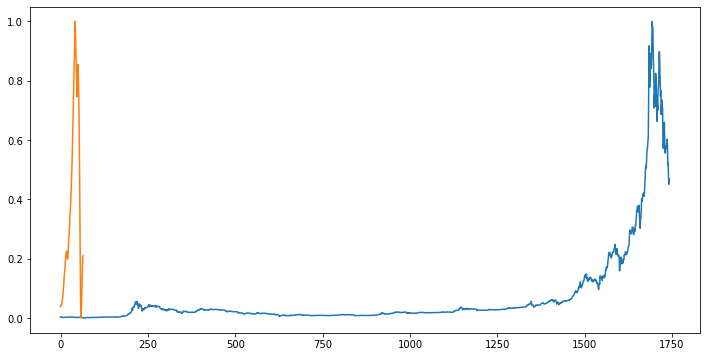

In [42]:
plt.subplots(figsize=(12, 6))
plt.plot(bitcoin_data['adj_close'])
plt.plot(HymanMinsky_data['adj_y'])

plt.show()

In [43]:
bitcoin_close_data = bitcoin_data['adj_close'].to_numpy()

len(bitcoin_close_data)

1743

In [44]:
HymanMinsky_y_data = HymanMinsky_data['adj_y'].to_numpy()

len(HymanMinsky_y_data)

65

In [45]:
result = DTW(bitcoin_close_data, HymanMinsky_y_data)

result

array([[0.03510185, 0.03789466, 0.03796219, ..., 0.13615541, 0.17719339,
        0.20727468],
       [0.03457017, 0.07193314, 0.07532517, ..., 0.21707109, 0.31281712,
        0.38393639],
       [0.03485531, 0.07221828, 0.1096488 , ..., 0.25175954, 0.39401795,
        0.51984526],
       ...,
       [0.42999383, 0.85719485, 1.28432834, ..., 5.68043639, 5.96833868,
        6.22615968],
       [0.412505  , 0.82221719, 1.23186185, ..., 5.55877282, 5.82918627,
        6.06951844],
       [0.43021875, 0.83993094, 1.2495756 , ..., 5.57648657, 5.84690002,
        6.08723219]])

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]

In [0]:
df = pd.DataFrame(result)

In [48]:
df.shape

(1743, 65)

Text(0.5, 1.0, 'Correlation Heatmap')

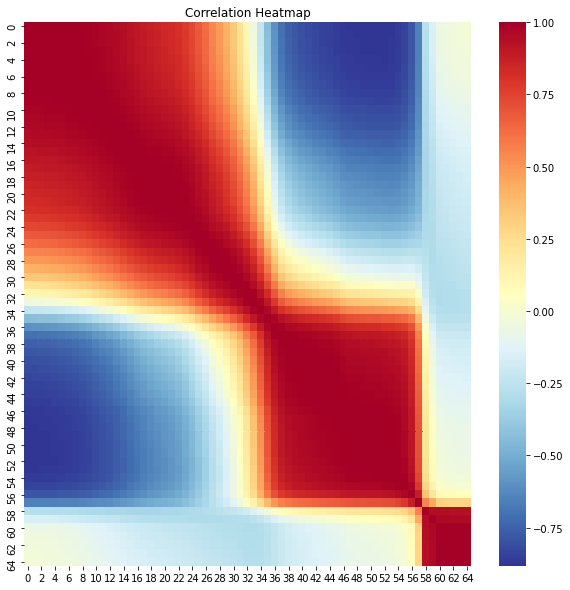

In [49]:
correlations = df.corr()

sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

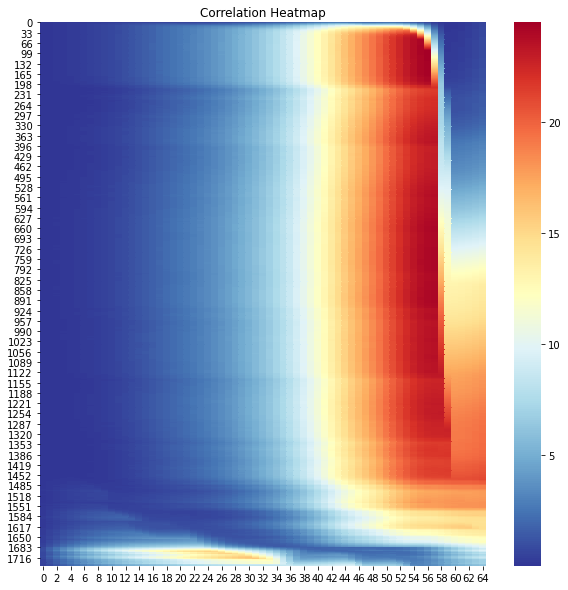

In [50]:
sns.heatmap(df, cmap = plt.cm.RdYlBu_r)
plt.title('Correlation Heatmap')

In [51]:
from dtw import dtw

ModuleNotFoundError: ignored